In [14]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__
import matplotlib.pyplot as plt
import time

In [15]:
df_train=pd.read_csv('partCleaned.csv')
df_train.head

<bound method NDFrame.head of      Unnamed: 0           State  Soil       Crop      Variety  Season  \
0             0  Andhra Pradesh     0       Rice      Mashuri  Kharif   
1             1  Andhra Pradesh     0       Rice      Mashuri  Kharif   
2             2  Andhra Pradesh     0       Rice      Mashuri  Kharif   
3             3  Andhra Pradesh     0       Rice      Mashuri  Kharif   
4             4  Andhra Pradesh     0       Rice      Mashuri  Kharif   
5             5  Andhra Pradesh     0       Rice      Mashuri  Kharif   
6             6  Andhra Pradesh     0       Rice      Mashuri  Kharif   
7             7  Andhra Pradesh     0       Rice      Mashuri  Kharif   
8             8  Andhra Pradesh     0       Rice      Mashuri  Kharif   
9             9  Andhra Pradesh     0       Rice      Mashuri  Kharif   
10           10  Andhra Pradesh     0       Rice      Mashuri  Kharif   
11           11  Andhra Pradesh     0       Rice      Mashuri  Kharif   
12           12  Andh

In [16]:
df_tr=df_train

In [17]:
clmns = ['Soil','Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)']

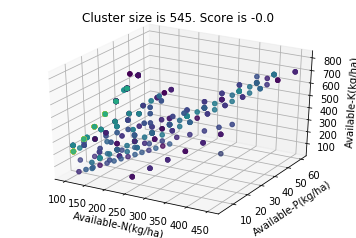

In [18]:
# for i in range(2,700,20):
kmeans = KMeans(n_clusters=545, random_state=0).fit(df_tr[['Soil','Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)']])
labels = kmeans.labels_
df_tr['clusters'] = labels
clmns.extend(['clusters'])
df_clust=df_tr[clmns]
df_test=df_tr[['Soil','Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)']]
#listOutput.append(kmeans.score(df_test.values))
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_tr['Available-N(kg/ha)'],df_tr['Available-P(kg/ha)'],df_tr['Available-K(kg/ha)'],c=labels,marker='o');
ax.set_title("Cluster size is "+str(545)+". Score is "+str(kmeans.score(df_test.values)))
ax.set_xlabel('Available-N(kg/ha)')
ax.set_ylabel('Available-P(kg/ha)')
ax.set_zlabel('Available-K(kg/ha)')
plt.show()
# values=np.array([['122','6.048','348']])#,['0.4','0.5','0.6','0.6']])
# #     print(values)
# prediction=kmeans.predict(values)
# #     print(prediction)
# out=df_tr[['Crop','Variety']].loc[df_tr['clusters'] ==  prediction[0]]
# print(out)

In [19]:
 from scipy import sparse
 values=np.array([['0','735','21.04','801.02']])#,['0.4','0.5','0.6','0.6']])
 print(values)
 #m[inds,np.arange(mshape[1])]=values

[['0' '735' '21.04' '801.02']]


In [20]:
prediction=kmeans.predict(values)
print(prediction)

[37]


In [21]:
df_tr[['Crop','Variety','Soil','Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)','Required-N(kg/ha)','Required-P(kg/ha)','Required-K(kg/ha)','Yeild(q/ha)']].loc[df_tr['clusters'] ==  prediction[0]]

,Crop,Variety,Soil,Available-N(kg/ha),Available-P(kg/ha),Available-K(kg/ha),Required-N(kg/ha),Required-P(kg/ha),Required-K(kg/ha),Yeild(q/ha)
64,Rice,MTU-2067,2,450,60,700,15.0,10.0,2.0,55.0
65,Rice,MTU-2067,2,450,60,700,2.0,10.0,15.0,60.0
208,Rice,IR-64,2,450,60,700,60.0,10.0,10.0,70.0
209,Rice,IR-64,2,450,60,700,86.0,30.0,18.0,80.0


In [13]:
#df_tr.describe
df_test=df_tr[['Soil','Available-N(kg/ha)','Available-P(kg/ha)','Available-K(kg/ha)']]
kmeans.score(df_test.values)

-0.0